In [5]:
import pandas as pd

url=r'C:\Users\w10\Desktop\Hp\bankdata.xls'
bank=pd.read_excel(url,sheet_name='bank-data')
bank.shape

(600, 12)

In [6]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats
import pandas

import seaborn as sns;
sns.set()

from scipy.spatial.distance import  cdist,pdist
from sklearn.cluster import KMeans


In [8]:
from sklearn.preprocessing import LabelEncoder
lb_make = LabelEncoder()
bank["regi"] = lb_make.fit_transform(bank["region"])


bank=bank.drop('region', 1)
bank=bank.drop('id', 1)

Text(0.5, 1.0, 'Elbow for KMeans clustering (Bank Customer  Data)')

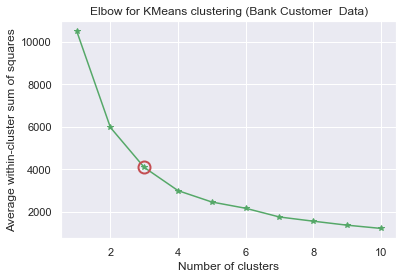

In [11]:
k = range(1,11)

clusters = [KMeans(n_clusters = c,init = 'k-means++').fit(bank) 
            for c in k]
centr_lst = [cc.cluster_centers_ for cc in clusters]

k_distance = [cdist(bank, cent, 'euclidean') for cent in centr_lst]
clust_indx = [np.argmin(kd,axis=1) for kd in k_distance]
distances = [np.min(kd,axis=1) for kd in k_distance]
avg_within = [np.sum(dist)/bank.shape[0] for dist in distances]

kidx = 2

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(k, avg_within, 'g*-')
ax.plot(k[kidx], avg_within[kidx], marker='o', markersize=12, \
markeredgewidth=2, markeredgecolor='r', markerfacecolor='None')
plt.grid(True)
plt.xlabel('Number of clusters')
plt.ylabel('Average within-cluster sum of squares')
plt.title('Elbow for KMeans clustering (Bank Customer  Data)')

In [14]:
from sklearn.decomposition import PCA
pca=PCA(n_components=4)
fit=pca.fit(bank)
fit.explained_variance_ratio_

array([9.99999432e-01, 5.42004326e-07, 9.95678376e-09, 6.72390781e-09])

In [15]:
from sklearn import cluster
from sklearn import metrics

k_means = cluster.KMeans(n_clusters=3)

kmf=k_means.fit(bank)

Pred_kmeans = kmf.predict(bank)

ms=metrics.silhouette_score(bank, Pred_kmeans,metric='euclidean')
print("silhouette_score=%f",ms)

Pred_kmeans

silhouette_score=%f 0.5637260991980797


array([2, 0, 2, 2, 1, 0, 2, 0, 0, 0, 1, 0, 2, 1, 2, 2, 2, 1, 0, 2, 1, 2,
       0, 2, 2, 1, 2, 2, 0, 0, 2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 0, 0, 1, 0,
       2, 1, 2, 2, 0, 2, 2, 0, 2, 0, 1, 1, 0, 2, 2, 0, 0, 0, 0, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 1, 0, 0, 1, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2,
       2, 0, 0, 0, 0, 1, 1, 2, 2, 0, 2, 2, 0, 2, 2, 0, 0, 0, 1, 2, 2, 0,
       0, 0, 0, 0, 1, 1, 2, 2, 2, 1, 0, 1, 2, 0, 1, 0, 0, 1, 2, 2, 2, 1,
       2, 0, 1, 0, 2, 0, 1, 1, 0, 2, 2, 1, 2, 1, 2, 2, 0, 0, 0, 0, 1, 0,
       2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 0, 0, 1, 2, 0, 0, 1, 1,
       0, 0, 2, 0, 2, 1, 0, 2, 0, 0, 2, 0, 0, 2, 1, 2, 1, 2, 0, 2, 2, 1,
       2, 2, 0, 1, 2, 2, 2, 2, 1, 2, 0, 2, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 2, 0, 0, 2, 0, 1, 2, 1, 2, 2, 2, 2, 1,
       0, 2, 0, 0, 2, 2, 2, 2, 1, 0, 2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 1,
       2, 2, 0, 0, 0, 2, 1, 1, 2, 0, 0, 2, 0, 2, 0, 0, 2, 2, 1, 0, 2, 2,
       0, 0, 2, 0, 2, 0, 1, 2, 2, 0, 0, 2, 2, 2, 2,